In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Dados Usados Para criar o post de Correlação 

alunos = ["João", "Gabriel", "Maria", "Ana", "Isa", "Pedro", "José", "Clara", "Rica", "Guilherme"]
horas = [12, 5, 7, 20, 10, 9, 4, 13, 2, 8]
notas = [7, 4, 4.5, 10, 8, 6, 3, 7.8, 1, 5]
data = { "Horas":horas, "notas":notas}
Estudos = pd.DataFrame(data = data, index=alunos)
Estudos.sort_values("notas", ascending=False, inplace=True)
Estudos.to_csv(".\correlacao.csv")


In [3]:
#Regressão linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
test = np.array(Estudos["Horas"]).reshape(-1,1)
model.fit(test, Estudos["notas"])
y = lambda x: x * model.coef_ + model.intercept_

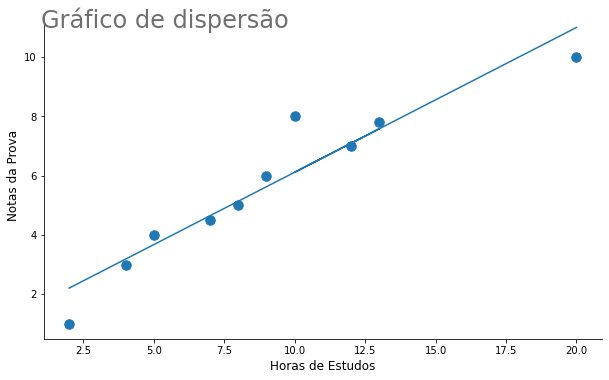

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(Estudos["Horas"], Estudos["notas"],  s=90)
ax.set_ylabel("Notas da Prova", fontsize=12)
ax.set_xlabel("Horas de Estudos", fontsize=12)
ax.text(1,11, 
        "Gráfico de dispersão", 
        fontsize=24, 
        color="#6F6F6F")
ax.spines[["top", "right"]].set_visible(False)
plt.plot(Estudos["Horas"], [y(i) for i in Estudos["Horas"]])
fig.savefig(".\dispersao.png")


In [5]:
#Criando formula para calcular o coeficente de correlação

horas = Estudos["Horas"]
notas = Estudos["notas"]
n= len(Estudos)

#definindo função
def coef_r(x, y, n):
    ''''
    n = numero de pares de dados amostrais
    sum_x = ∑(x)
    sum_x2 = ∑(x²)
    sum_y = ∑(y)
    sum_y2 = ∑(y²)
    sum_x_y = ∑(x*y)
    
    n*∑(x*y)   *     ∑x*∑y
    ----------------------
    ((n*∑(x²)-∑(x)**2)**0.5) * ((n*∑(y²) - ∑(y)**2)**0.5)
    
    '''
    sum_x = sum(x)
    sum_x2 = sum((x**2))
    sum_y = sum(y)
    sum_y2 = sum((y**2))
    sum_x_y = sum(y*x)

    r_dividendo= (n*sum_x_y - sum_x*sum_y)
    r_divisor= ( ( (n*sum_x2-sum_x**2)**0.5 ) * (((n*sum_y2 - sum_y**2))**.5))
    
    r = r_dividendo/r_divisor

    return r
#chamando função
coef_r(horas,notas, n)

0.9488764108358538

In [6]:
#resolvendo por pandas
r =Estudos.corr()["Horas"]["notas"]
print(r)

0.9488764108358545
